# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import gdown
from numpy import loadtxt
from numpy import sort
from math import log
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
from wordcloud import WordCloud, STOPWORDS
from random import sample
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.utils import resample
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel



from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tensorflow.keras.layers import Dense,Flatten,Input
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score

# Import Data

In [2]:
#!pip install gdown==4.6.0
!gdown --id 1N_A_88DyOGoQKmgMs9sfnP00cmxYbYYnM9wGyAlfvS8 #import Data from Google Drive

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1N_A_88DyOGoQKmgMs9sfnP00cmxYbYYnM9wGyAlfvS8
From (redirected): https://docs.google.com/spreadsheets/d/1N_A_88DyOGoQKmgMs9sfnP00cmxYbYYnM9wGyAlfvS8/export?format=xlsx
To: /content/set-50-data.xlsx
174kB [00:00, 78.1MB/s]


In [3]:
file_name = 'set-50-data.xlsx'
df = pd.read_excel(file_name)

In [4]:
# Example DataFrame and Select Features
df = df[["name", "juristicid", "year", "accountreceivable", "accountpayable", "totalnoncurrentliability", "totalliability", "totalcurrentliability", "totalcurrentasset", "totalasset", "totalexpense", "cashandcashequivalent", "otherincome", "totalrevenue", "netprofitloss"]]
df

,name,juristicid,year,accountreceivable,accountpayable,totalnoncurrentliability,totalliability,totalcurrentliability,totalcurrentasset,totalasset,totalexpense,cashandcashequivalent,otherincome,totalrevenue,netprofitloss
0,บมจ.ปตท.สำรวจและผลิตปิโตรเลียม จำกัด (มหาชน),107535000206,2012-12-31,79709900,299759400,53938000000,93225900000,39287900000,77005050000,352060200000,46514660000,53081590000,10532270000,117038600000,46498050000
1,บมจ.ปตท.สำรวจและผลิตปิโตรเลียม จำกัด (มหาชน),107535000206,2013-12-31,123046500,400428800,76098740000,130205900000,54107150000,83448510000,422358100000,59385490000,56703740000,11082160000,126276200000,37214380000
2,บมจ.ปตท.สำรวจและผลิตปิโตรเลียม จำกัด (มหาชน),107535000206,2014-12-31,63613080,564459700,112899200000,158508600000,45609440000,115411600000,493552200000,65573020000,94837250000,7700734000,120666500000,34203590000
3,บมจ.ปตท.สำรวจและผลิตปิโตรเลียม จำกัด (มหาชน),107535000206,2015-12-31,2300248000,12237270000,112737400000,167723400000,54985950000,118792400000,533291100000,68124360000,86354500000,8266291000,94756570000,9222879000
4,บมจ.ปตท.สำรวจและผลิตปิโตรเลียม จำกัด (มหาชน),107535000206,2016-12-31,1819222000,9371848000,99131150000,119372400000,20241200000,261592400000,487055100000,54244180000,43982100000,6654851000,80308410000,17099790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,บริษัท เงินติดล้อ จำกัด (มหาชน),107563000355,2020-12-31,418290000,1381386000,28989430000,41586990000,12597560000,22076410000,53335520000,7533204000,1265233000,10560520000,10560520000,2416143000
431,บมจ.บริษัท เงินติดล้อ จำกัด (มหาชน),107563000355,2021-12-31,824124000,1516073000,21617150000,44120440000,17927390000,26732130000,66525400000,8304763000,3994739000,210655000,12232500000,3168906000
432,บริษัท เงินติดล้อ จำกัด (มหาชน),107563000355,2022-12-31,1067225000,1825644000,36703900000,59305090000,22601190000,29828750000,84727050000,10101950000,2191187000,-607453000,14635310000,3640169000
433,บมจ.บริษัท เอสซีบี เอกซ์ จำกัด (มหาชน),107564000341,2021-12-31,0,0,0,8669730,8669730,4640,5390,8674340,4640,0,0,-8674340


**Create Percent Change Columns**

In [5]:
# Filter ข้อมูลที่ปีอยู่ในช่วง 2013-2022
df_filtered = df[(df['year'].dt.year >= 2013) & (df['year'].dt.year <= 2022)]

# จัดเรียงข้อมูลตาม id และ year
df_filtered = df_filtered.sort_values(by=['juristicid', 'year'])

# คำนวณเปอร์เซ็นต์การเปลี่ยนแปลงของแต่ละ Features สำหรับแต่ละ id
for feature in df.columns[3:]:
  df_filtered[f'pct_{feature}'] = df_filtered.groupby('juristicid')[feature].pct_change() * 100
#df_filtered['pct_accountreceivable'] = df_filtered.groupby('juristicid')['accountreceivable'].pct_change() * 100
dat = pd.DataFrame(df_filtered)
# ตั้งค่าการแสดงผลของตัวเลขใน DataFrame ให้แสดงเป็นทศนิยม 2 ตำแหน่ง
pd.options.display.float_format = '{:.2f}'.format

**Data Info**

In [6]:
data_info = pd.set_option('display.max_columns', None)
data_info=pd.DataFrame(dat.dtypes).T.rename(index={0:'column type'})
data_info=data_info._append(pd.DataFrame(dat.isnull().sum()).T.rename(index={0:'null values (nb)'}))
data_info=data_info._append(pd.DataFrame(dat.isnull().sum()/dat.shape[0]*100).T.
                          rename(index={0:'null values (%)'}))
display(data_info)

,name,juristicid,year,accountreceivable,accountpayable,totalnoncurrentliability,totalliability,totalcurrentliability,totalcurrentasset,totalasset,totalexpense,cashandcashequivalent,otherincome,totalrevenue,netprofitloss,pct_accountreceivable,pct_accountpayable,pct_totalnoncurrentliability,pct_totalliability,pct_totalcurrentliability,pct_totalcurrentasset,pct_totalasset,pct_totalexpense,pct_cashandcashequivalent,pct_otherincome,pct_totalrevenue,pct_netprofitloss
column type,object,int64,datetime64[ns],int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
null values (nb),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,85,49,49,50,49,49,49,49,49,49,49
null values (%),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,13.28,21.30,12.28,12.28,12.53,12.28,12.28,12.28,12.28,12.28,12.28,12.28


# DataFrame Overview

This DataFrame `(dat)` contains the following columns:

- `name`: Name of the company (object)
- `juristicid`: ID of Company(integer)
- `year`: Fiscal year (datetime)
- `accountreceivable`: Total accounts receivable (integer)
- `accountpayable`: Total accounts payable (integer)
- `totalnoncurrentliability`: Total non-current liabilities (integer)
- `totalliability`: Total liabilities (integer)
- `totalcurrentliability`: Total current liabilities (integer)
- `totalcurrentasset`: Total current assets (integer)
- `totalasset`: Total assets (integer)
- `totalexpense`: Total expenses (integer)
- `cashandcashequivalent`: Cash and cash equivalents (integer)
- `otherincome`: Other income (integer)
- `totalrevenue`: Total revenue (integer)
- `netprofitloss`: Net profit/loss (integer)
- `pct_* columns`: Percentage change columns (float64), with some missing values

### Data Summary

- **Non-Null Count**: Most columns have 399 non-null values.
- **Data Types**: The DataFrame contains columns of type `int64`, `float64`, `datetime64[ns]`, and `object`.
- **Total Company**: The total company in this DataFrame is `49`


In [7]:
dat

,name,juristicid,year,accountreceivable,accountpayable,totalnoncurrentliability,totalliability,totalcurrentliability,totalcurrentasset,totalasset,totalexpense,cashandcashequivalent,otherincome,totalrevenue,netprofitloss,pct_accountreceivable,pct_accountpayable,pct_totalnoncurrentliability,pct_totalliability,pct_totalcurrentliability,pct_totalcurrentasset,pct_totalasset,pct_totalexpense,pct_cashandcashequivalent,pct_otherincome,pct_totalrevenue,pct_netprofitloss
1,บมจ.ปตท.สำรวจและผลิตปิโตรเลียม จำกัด (มหาชน),107535000206,2013-12-31,123046500,400428800,76098740000,130205900000,54107150000,83448510000,422358100000,59385490000,56703740000,11082160000,126276200000,37214380000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,บมจ.ปตท.สำรวจและผลิตปิโตรเลียม จำกัด (มหาชน),107535000206,2014-12-31,63613080,564459700,112899200000,158508600000,45609440000,115411600000,493552200000,65573020000,94837250000,7700734000,120666500000,34203590000,-48.30,40.96,48.36,21.74,-15.71,38.30,16.86,10.42,67.25,-30.51,-4.44,-8.09
3,บมจ.ปตท.สำรวจและผลิตปิโตรเลียม จำกัด (มหาชน),107535000206,2015-12-31,2300248000,12237270000,112737400000,167723400000,54985950000,118792400000,533291100000,68124360000,86354500000,8266291000,94756570000,9222879000,3516.00,2067.96,-0.14,5.81,20.56,2.93,8.05,3.89,-8.94,7.34,-21.47,-73.04
4,บมจ.ปตท.สำรวจและผลิตปิโตรเลียม จำกัด (มหาชน),107535000206,2016-12-31,1819222000,9371848000,99131150000,119372400000,20241200000,261592400000,487055100000,54244180000,43982100000,6654851000,80308410000,17099790000,-20.91,-23.42,-12.07,-28.83,-63.19,120.21,-8.67,-20.37,-49.07,-19.49,-15.25,85.41
5,บริษัท ปตท.สำรวจและผลิตปิโตรเลียม จำกัด (มหาชน),107535000206,2018-12-31,27179580000,1026657000,68440100000,128586000000,60145940000,104950700000,451550000000,58776720000,14994850000,9077071000,100790000000,26275640000,1394.02,-89.05,-30.96,7.72,197.15,-59.88,-7.29,8.36,-65.91,36.40,25.50,53.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,บริษัท เงินติดล้อ จำกัด (มหาชน),107563000355,2020-12-31,418290000,1381386000,28989430000,41586990000,12597560000,22076410000,53335520000,7533204000,1265233000,10560520000,10560520000,2416143000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431,บมจ.บริษัท เงินติดล้อ จำกัด (มหาชน),107563000355,2021-12-31,824124000,1516073000,21617150000,44120440000,17927390000,26732130000,66525400000,8304763000,3994739000,210655000,12232500000,3168906000,97.02,9.75,-25.43,6.09,42.31,21.09,24.73,10.24,215.73,-98.01,15.83,31.16
432,บริษัท เงินติดล้อ จำกัด (มหาชน),107563000355,2022-12-31,1067225000,1825644000,36703900000,59305090000,22601190000,29828750000,84727050000,10101950000,2191187000,-607453000,14635310000,3640169000,29.50,20.42,69.79,34.42,26.07,11.58,27.36,21.64,-45.15,-388.36,19.64,14.87
433,บมจ.บริษัท เอสซีบี เอกซ์ จำกัด (มหาชน),107564000341,2021-12-31,0,0,0,8669730,8669730,4640,5390,8674340,4640,0,0,-8674340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dat.describe()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2

,juristicid,year,accountreceivable,accountpayable,totalnoncurrentliability,totalliability,totalcurrentliability,totalcurrentasset,totalasset,totalexpense,cashandcashequivalent,otherincome,totalrevenue,netprofitloss,pct_accountreceivable,pct_accountpayable,pct_totalnoncurrentliability,pct_totalliability,pct_totalcurrentliability,pct_totalcurrentasset,pct_totalasset,pct_totalexpense,pct_cashandcashequivalent,pct_otherincome,pct_totalrevenue,pct_netprofitloss
count,399.00,399,399.00,399.00,399.00,399.00,399.00,399.00,399.00,399.00,399.00,399.00,399.00,399.00,346.00,314.00,350.00,350.00,349.00,350.00,350.00,350.00,350.00,350.00,350.00,350.00
mean,107543922756.45,2018-10-31 16:39:41.954887168,164387214819.57,78226927619.38,50403925027.85,262233324955.20,213510333997.19,251476754848.47,353797157323.23,89170990976.69,11288418372.13,18017673172.69,102169287424.25,10288912902.80,inf,inf,inf,2014.48,inf,2169206.42,28858018.58,787.90,inf,inf,inf,-1396.32
min,107535000206.00,2013-12-31 00:00:00,0.00,0.00,0.00,8041819.00,0.00,4640.00,5390.00,-1348589000.00,0.00,-4598217000.00,-690485400.00,-16409610000.00,-100.00,-100.00,-99.90,-99.91,-100.00,-99.98,-99.90,-241.12,-100.00,-388.36,-107.67,-742648.48
25%,107536000994.00,2015-12-31 00:00:00,597612200.00,267375350.00,5541201000.00,14150885000.00,5826269000.00,7051947500.00,42977945000.00,1739845500.00,588333100.00,1380344000.00,7618654000.00,2165338500.00,-10.07,-10.52,-7.36,-2.05,-18.30,-9.29,1.39,-6.08,-36.95,-27.08,-7.42,-20.68
50%,107537002559.00,2018-12-31 00:00:00,2390963000.00,1510620000.00,25799600000.00,45909260000.00,16984110000.00,19502920000.00,95287770000.00,13265740000.00,2812094000.00,4403648000.00,21888150000.00,5050317000.00,10.99,8.70,8.52,6.15,8.62,6.21,6.92,5.64,3.36,5.19,4.35,3.05
75%,107552000201.00,2020-12-31 00:00:00,10644875000.00,7165065000.00,66333500000.00,122968050000.00,42952545000.00,69442540000.00,256686050000.00,54534935000.00,10571530000.00,11142345000.00,71920630000.00,11440645000.00,42.35,32.72,34.45,23.74,42.49,27.51,16.82,18.52,56.28,39.56,19.13,35.85
max,107564000341.00,2022-12-31 00:00:00,2911232000000.00,2974949000000.00,380477100000.00,3355426000000.00,2974949000000.00,3624870000000.00,3840076000000.00,2482587000000.00,94837250000.00,1471550000000.00,2560451000000.00,95887080000.00,inf,inf,inf,510906.57,inf,758933305.17,10100105651.39,116175.87,inf,inf,inf,137686.63
std,9133203.55,NaN,529768042597.92,411156644435.14,65836188533.39,655221888398.34,617520517122.53,717151142089.61,736788169718.79,269573526040.04,19146955585.07,101144779256.16,279156754745.31,14010971583.28,NaN,NaN,NaN,28121.04,NaN,40566648.86,539873325.26,8756.80,NaN,NaN,NaN,40664.43


In [9]:
dat.to_csv("feature_sel.csv", encoding="'utf-8-sig'")

## Prepare data & Exploration analysis

## Exploration Analysis

In [10]:
# disable warning
import warnings
warnings.filterwarnings('ignore')

**Drop Outliers of pct_net**

In [11]:
pct_net = dat['pct_netprofitloss'].dropna()
print("Old shape: ", pct_net.shape)

# IQR
Q1 = pct_net.quantile(0.25)
Q3 = pct_net.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Identify the positions of outliers
upper_array = np.where(pct_net >= upper)[0]
lower_array = np.where(pct_net <= lower)[0]

# Combine both arrays
outlier_indices = np.concatenate([upper_array, lower_array])

# Make sure the indices are within bounds
outlier_indices = outlier_indices[outlier_indices < len(pct_net)]

# Remove the outliers in one step
pct_net = pct_net.drop(pct_net.index[outlier_indices])

# Print the new shape of the DataFrame
print("New Shape: ", pct_net.shape)

Old shape:  (350,)
New Shape:  (306,)


In [12]:
pct_net

,pct_netprofitloss
2,-8.09
3,-73.04
4,85.41
5,53.66
6,34.25
...,...
425,71.70
427,-88.57
428,-87.22
431,31.16


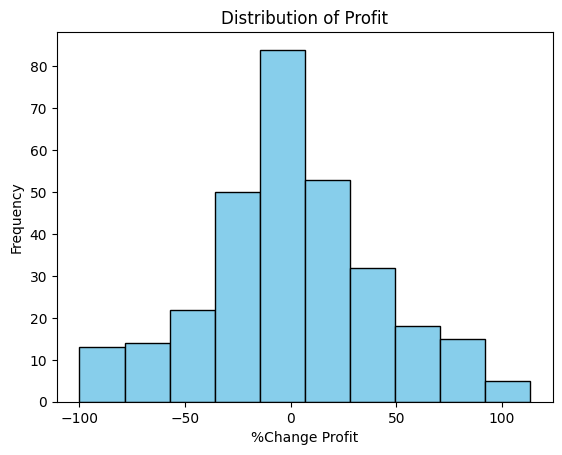

In [13]:
# Plotting a histogram
plt.hist(pct_net, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('%Change Profit')
plt.ylabel('Frequency')
plt.title('Distribution of Profit')
plt.show()

In [14]:
pct_net.mean()

0.9927894749297062

# **Model Part2**

In [15]:
from sklearn.impute import SimpleImputer

columns_to_drop = [col for col in dat.columns if col.startswith('pct_') and col != 'pct_netprofitloss']
dat = dat.drop(columns=columns_to_drop)
dat = dat.drop(columns=["name","year"])
dat = dat[dat['juristicid'] != 107564000341] # ดรอปทิ้งเพราะงบการเงินของ ScbX ค่อนข้างมีปัญหา

# ใช้ SimpleImputer เพื่อเติมค่า NaN ด้วยค่าเฉลี่ย
imputer = SimpleImputer(strategy='constant', fill_value=pct_net.mean())  # หรือ strategy='median'
dat = pd.DataFrame(imputer.fit_transform(dat), columns=dat.columns)

# จัดการดรอป row ที่มีค่า outliers อีกครั้ง
pct_net = dat['pct_netprofitloss'].dropna()

# คำนวณ IQR
Q1 = pct_net.quantile(0.25)
Q3 = pct_net.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# ระบุตำแหน่งของ outliers
outliers = (pct_net < lower) | (pct_net > upper)

# ลบแถวที่มีค่า outliers ออกจาก dat
dat = dat[~outliers]

# ตรวจสอบผลลัพธ์
print("Shape after removing outliers: ", dat.shape)


Shape after removing outliers:  (344, 14)


In [16]:
dat.describe()

,juristicid,accountreceivable,accountpayable,totalnoncurrentliability,totalliability,totalcurrentliability,totalcurrentasset,totalasset,totalexpense,cashandcashequivalent,otherincome,totalrevenue,netprofitloss,pct_netprofitloss
count,344.00,344.00,344.00,344.00,344.00,344.00,344.00,344.00,344.00,344.00,344.00,344.00,344.00,344.00
mean,107543613798.28,188796516002.09,88981313843.11,50738119008.87,292808280766.08,243433253982.12,285435364327.03,386603750578.49,87981047061.80,11850945096.51,19154698849.18,101178087614.16,10291619728.75,1.42
std,9007053.65,566784089110.37,441838035573.35,66782123312.69,700124865906.10,660098189590.07,766767098398.54,785696262765.88,276672688767.61,19925289876.36,108706672764.66,286233792573.27,13161701671.53,35.60
min,107535000206.00,0.00,0.00,30818170.00,92173030.00,0.00,129178200.00,4447438000.00,28992000.00,0.00,-4598217000.00,47277770.00,-11038080000.00,-87.22
25%,107536000919.00,567882900.00,264724075.00,5904276250.00,14011990000.00,5932215000.00,7055709250.00,43005877500.00,1802978000.00,603317400.00,1388631500.00,7787518500.00,2232832500.00,-16.20
50%,107537002443.00,2297523500.00,1452662000.00,25007270000.00,45842800000.00,17003010000.00,19834935000.00,94977430000.00,13605290000.00,2904642000.00,4348364500.00,22353635000.00,4971710500.00,0.99
75%,107551000223.00,10331450000.00,6661418000.00,67368872500.00,130814700000.00,45313130000.00,76258405000.00,263479400000.00,54389557500.00,11109805000.00,11046657500.00,66181182500.00,11382107500.00,17.73
max,107563000355.00,2911232000000.00,2974949000000.00,380477100000.00,3355426000000.00,2974949000000.00,3624870000000.00,3840076000000.00,2482587000000.00,94837250000.00,1471550000000.00,2560451000000.00,94512110000.00,95.99


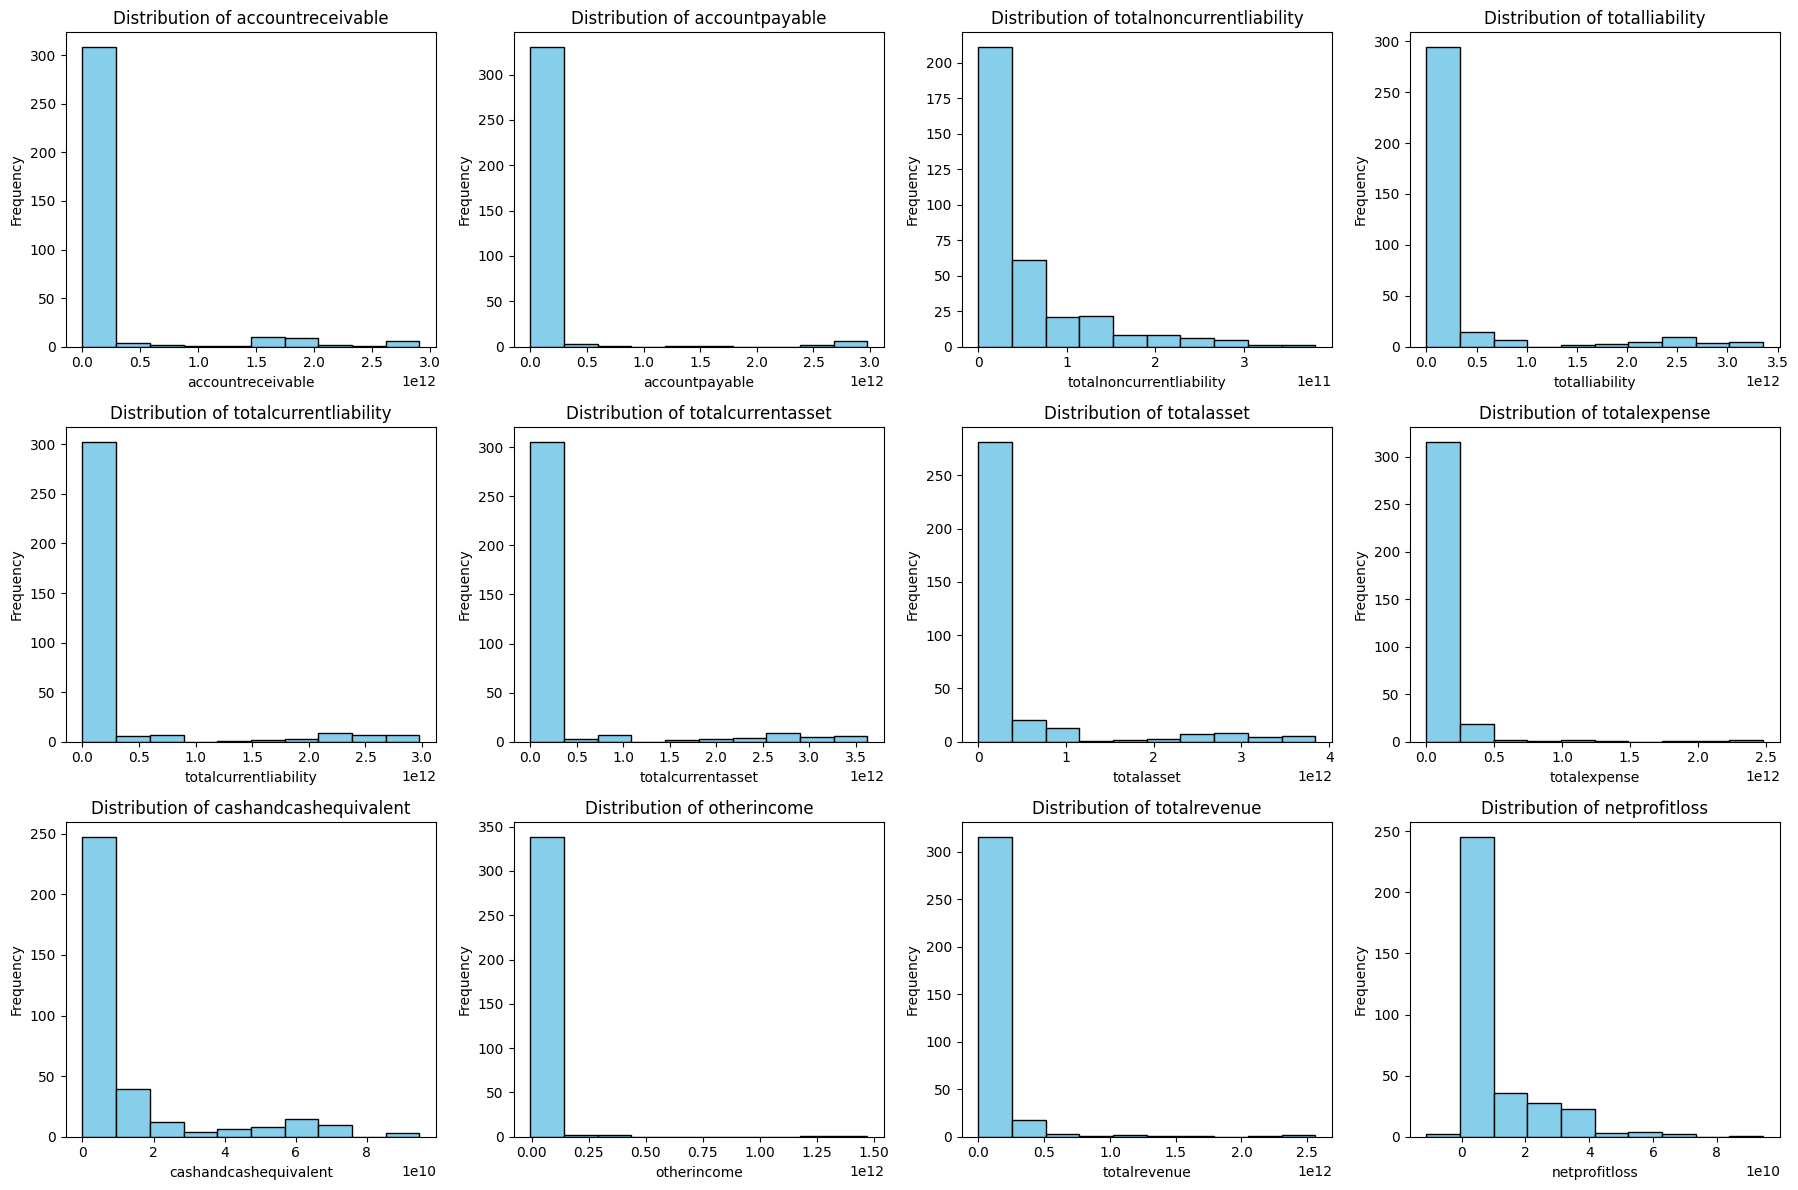

In [17]:
# ดึงคอลัมน์ที่ 2 ถึง 13 (index 1 ถึง 12) จาก DataFrame
columns = dat.iloc[:, 1:13].columns

# ตั้งค่า subplot grid ให้เหมาะกับจำนวนคอลัมน์
fig, axes = plt.subplots(3, 4, figsize=(18, 12))  # 3 rows, 4 columns grid

# ทำการ plot สำหรับแต่ละคอลัมน์
for i, col in enumerate(columns):
    ax = axes[i//4, i%4]  # เลือกตำแหน่งของ subplot
    ax.hist(dat[col], bins=10, color='skyblue', edgecolor='black')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


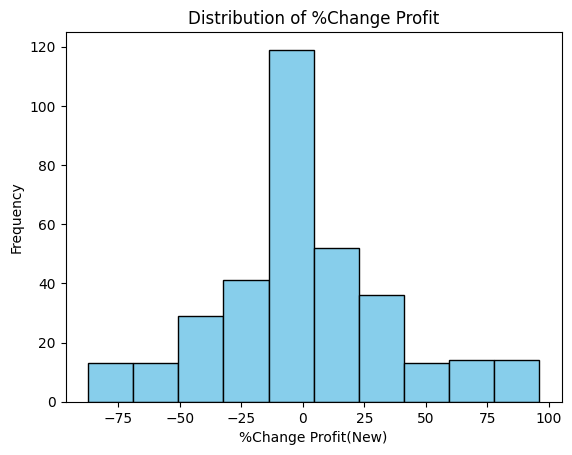

In [18]:
plt.hist(dat['pct_netprofitloss'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('%Change Profit(New)')
plt.ylabel('Frequency')
plt.title('Distribution of %Change Profit')
plt.show()

In [19]:
def drop_outliers_iqr(dat):
    columns = dat.iloc[:, 1:13].columns
    for i, col in enumerate(columns):
        if dat[col].dtype == 'float' or dat[col].dtype == 'int':
            Q1 = dat[col].quantile(0.25)
            Q3 = dat[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            dat = dat[(df[col] >= lower) & (dat[col] <= upper)]
    return dat

# เรียกใช้ฟังก์ชันสำหรับดรอปค่า outliers จาก DataFrame ทั้งหมด 13 คอลัมน์
dat_cleaned = drop_outliers_iqr(dat)

# ตรวจสอบผลลัพธ์
print("Shape after dropping outliers:", dat_cleaned.shape)

Shape after dropping outliers: (132, 14)


In [20]:
dat_cleaned.describe()

,juristicid,accountreceivable,accountpayable,totalnoncurrentliability,totalliability,totalcurrentliability,totalcurrentasset,totalasset,totalexpense,cashandcashequivalent,otherincome,totalrevenue,netprofitloss,pct_netprofitloss
count,132.00,132.00,132.00,132.00,132.00,132.00,132.00,132.00,132.00,132.00,132.00,132.00,132.00,132.00
mean,107546136883.33,1621168266.41,1023067245.80,15061016501.52,22922626249.47,8056143124.24,7578347428.03,51651855674.24,6536494301.97,1408803620.90,2760494165.43,9952028002.05,2639074553.71,4.30
std,9756888.64,2575987799.08,1112435237.65,16680947697.06,20464133747.36,7371550098.01,5853948416.26,37935590532.38,6998693783.24,1589482957.63,2679336166.36,7488547723.68,1899968534.48,37.21
min,107536000226.00,0.00,0.00,30818170.00,92173030.00,0.00,129178200.00,4447438000.00,28992000.00,0.00,-607453000.00,47277770.00,-1212204000.00,-85.96
25%,107536001389.00,244550175.00,220007625.00,1088029000.00,7222841000.00,2514370000.00,3401124500.00,21478730000.00,1119969000.00,157943475.00,520959050.00,3963605250.00,1128324750.00,-13.68
50%,107543000031.00,893963300.00,557500000.00,8134197000.00,14150885000.00,5351399500.00,6537078000.00,44392125000.00,2730683000.00,718971800.00,1823734000.00,7450739000.00,2169386500.00,0.99
75%,107555500110.25,2129262750.00,1658813500.00,25208227500.00,36352162500.00,12495422500.00,9811592000.00,76605565000.00,10941280000.00,2166361250.00,4173883500.00,15795592500.00,3561552500.00,20.83
max,107563000355.00,22898800000.00,5336367000.00,67556460000.00,87009500000.00,30104230000.00,29828750000.00,165245700000.00,25793440000.00,6220135000.00,10231190000.00,28576910000.00,7563176000.00,95.99


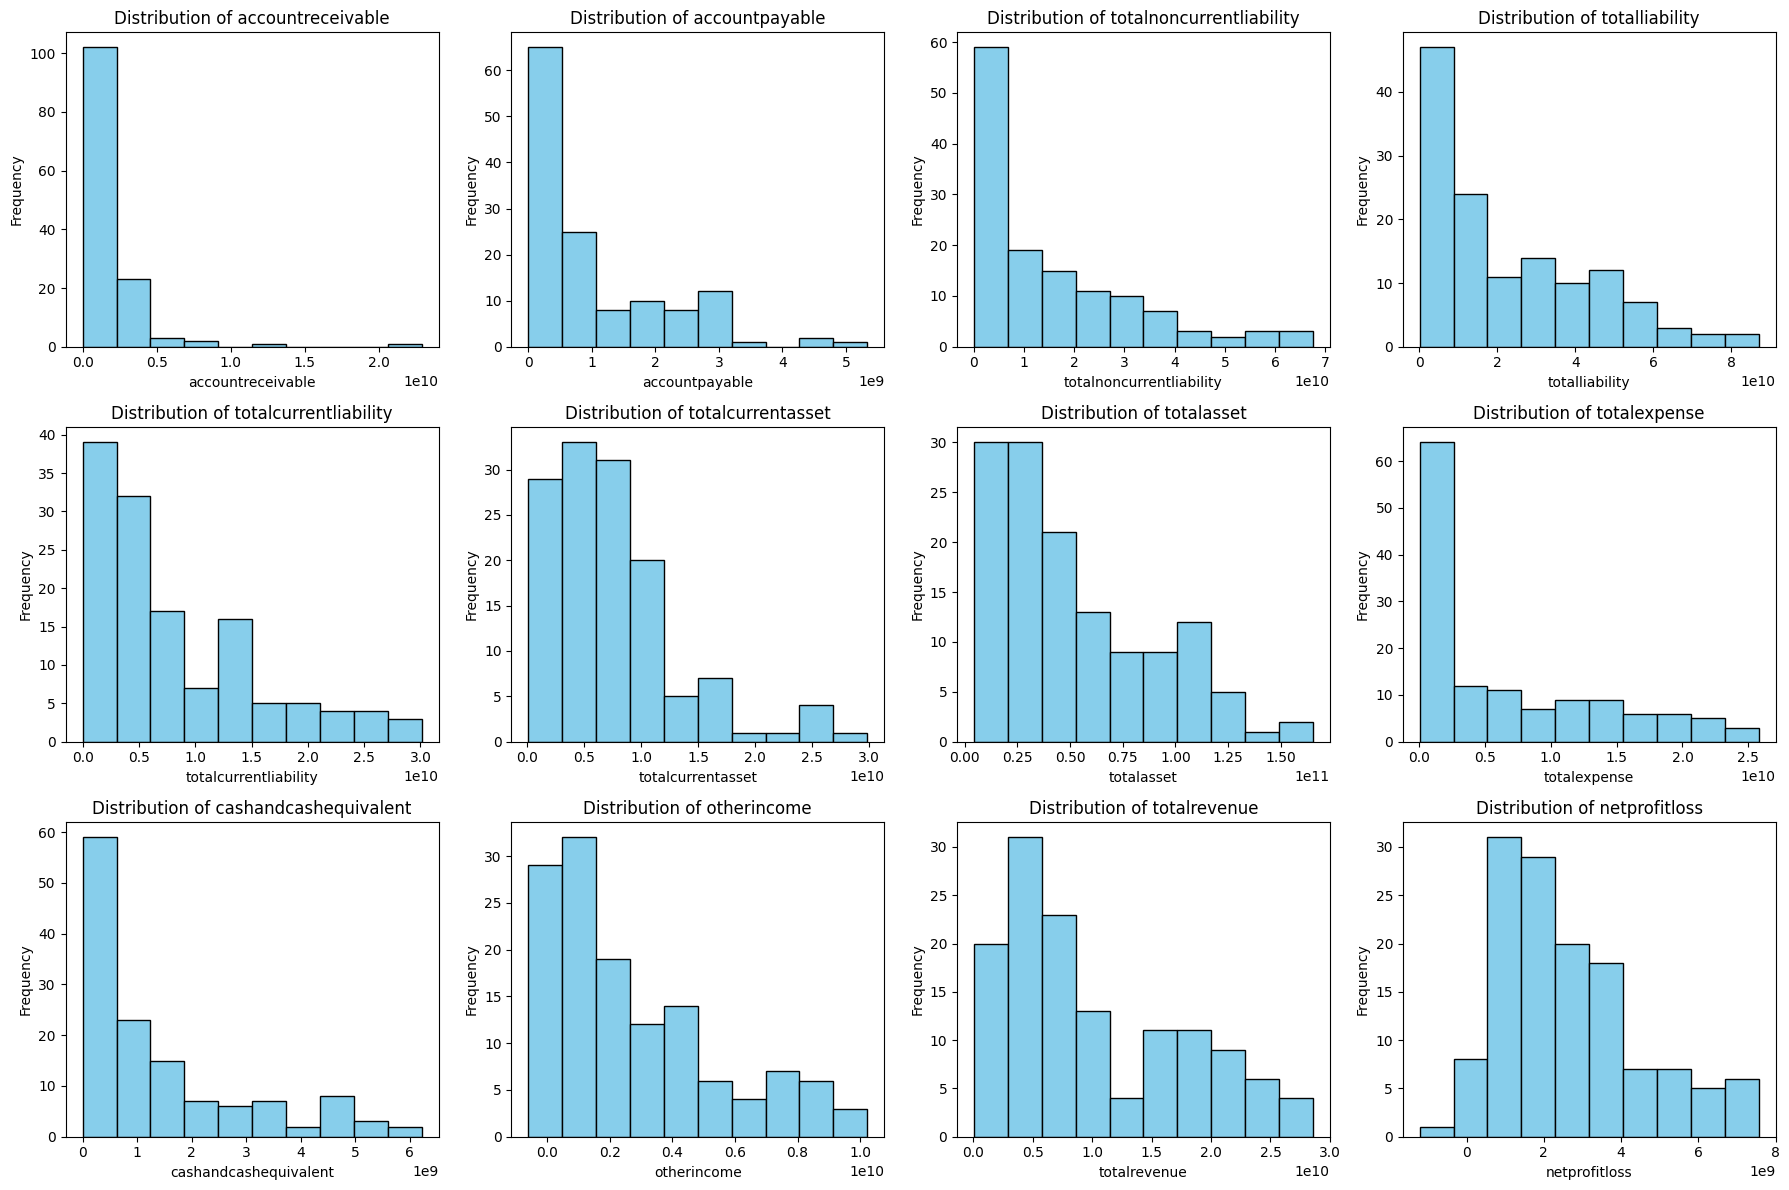

In [21]:
# ดึงคอลัมน์ที่ 2 ถึง 13 (index 1 ถึง 12) จาก DataFrame
columns = dat_cleaned.iloc[:, 1:13].columns

# ตั้งค่า subplot grid ให้เหมาะกับจำนวนคอลัมน์
fig, axes = plt.subplots(3, 4, figsize=(18, 12))  # 3 rows, 4 columns grid

# ทำการ plot สำหรับแต่ละคอลัมน์
for i, col in enumerate(columns):
    ax = axes[i//4, i%4]
    ax.hist(dat_cleaned[col], bins=10, color='skyblue', edgecolor='black')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [22]:
X = dat_cleaned.drop(columns=["juristicid", "pct_netprofitloss"])
y = dat_cleaned['pct_netprofitloss']

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 36 to 396
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   accountreceivable         132 non-null    float64
 1   accountpayable            132 non-null    float64
 2   totalnoncurrentliability  132 non-null    float64
 3   totalliability            132 non-null    float64
 4   totalcurrentliability     132 non-null    float64
 5   totalcurrentasset         132 non-null    float64
 6   totalasset                132 non-null    float64
 7   totalexpense              132 non-null    float64
 8   cashandcashequivalent     132 non-null    float64
 9   otherincome               132 non-null    float64
 10  totalrevenue              132 non-null    float64
 11  netprofitloss             132 non-null    float64
dtypes: float64(12)
memory usage: 13.4 KB


In [24]:
y.info()

<class 'pandas.core.series.Series'>
Index: 132 entries, 36 to 396
Series name: pct_netprofitloss
Non-Null Count  Dtype  
--------------  -----  
132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [25]:
X_train = X
y_train = y

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state= 36)

In [27]:
len(X_train)

105

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train_scale  = pipeline.fit_transform(X_train)
X_test_scale = pipeline.transform(X_test)

## Classical Model

**Linear Regression Model**

In [29]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scale,y_train)

LinearRegression()

In [30]:
print(lin_reg.intercept_)

3.3918481755434464


In [31]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
accountreceivable,5.58
accountpayable,-10.12
totalnoncurrentliability,-45.52
totalliability,82.99
totalcurrentliability,-17.68
totalcurrentasset,-3.93
totalasset,-33.12
totalexpense,39.44
cashandcashequivalent,-4.90
otherincome,0.50


In [45]:
# Evaluate on training data
y_train_pred = lin_reg.predict(X_train_scale)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Mean Squared Error (Train): {mse_train:.2f}")
print(f"R-squared (Train): {r2_train:.2f}")

# Evaluate on test data
y_test_pred = lin_reg.predict(X_test_scale)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error: {mse_test:.2f}")
print(f"R-squared: {r2_test:.2f}")


Mean Squared Error (Train): 1126.43
R-squared (Train): 0.26
Mean Squared Error: 658.90
R-squared: 0.17


In [43]:
from sklearn.ensemble import RandomForestRegressor

# โมเดล Random Forest
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train_scale, y_train)

# ทำนายค่าจากข้อมูลเทรนและข้อมูลทดสอบ
y_train_pred_rf = rf_model.predict(X_train_scale)
y_test_pred_rf = rf_model.predict(X_test_scale)

# คำนวณ MSE และ R² สำหรับข้อมูลเทรน
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)

print(f'MSE Random Forest (Train): {mse_train_rf:.2f}')
print(f'R² Random Forest (Train): {r2_train_rf:.2f}')

# คำนวณ MSE และ R² สำหรับข้อมูลทดสอบ
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print(f'MSE Random Forest (Test): {mse_test_rf:.2f}')
print(f'R² Random Forest (Test): {r2_test_rf:.2f}')



MSE Random Forest (Train): 266.30
R² Random Forest (Train): 0.82
MSE Random Forest (Test): 720.19
R² Random Forest (Test): 0.09


## Deep Learning Model

**Sequential Model** - Activation = ReLU

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

X_train = np.array(X_train_scale)
X_test = np.array(X_test_scale)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train_scale.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

# หยุดเมื่อค่า val_loss มีแนวโน้มเพิ่มขึ้น
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

r = model.fit(X_train_scale, y_train,
              validation_data=(X_test_scale,y_test),
              batch_size=1,
              epochs=200,
              callbacks=[early_stopping])

Epoch 1/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1383.8473 - val_loss: 857.6835
Epoch 2/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1329.7229 - val_loss: 857.4805
Epoch 3/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1718.9541 - val_loss: 857.1329
Epoch 4/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1262.4762 - val_loss: 856.9290
Epoch 5/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1859.0762 - val_loss: 856.7109
Epoch 6/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1754.6616 - val_loss: 856.5164
Epoch 7/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1741.2358 - val_loss: 856.2987
Epoch 8/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1366.3118 - val_loss: 856.0901
Epoch 9/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1579.6841 - val_loss: 855.8085
Epoch 10/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1370.8667 - val_loss: 855.6301
Epoch 11/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1465.5282 - val_l

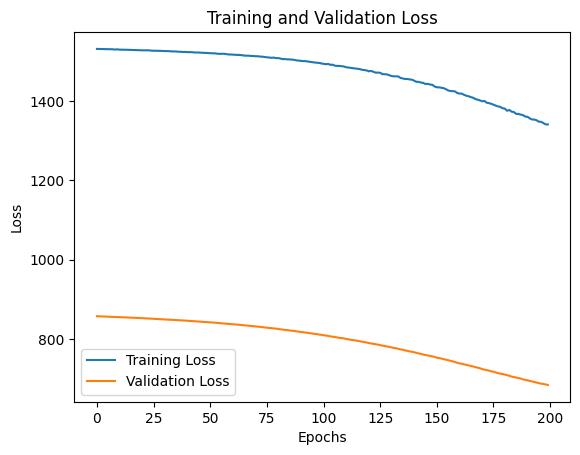

In [51]:
# Plot ค่า loss และ val_loss
plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [52]:
y_pred_ann = model.predict(X_test_scale)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [53]:
y_train_pred_ann = model.predict(X_train)
mse_train_ann = mean_squared_error(y_train, y_train_pred_ann)
rscore_train_ann = r2_score(y_train, y_train_pred_ann)
print('MSE (Train): {}'.format(mse_train_ann))
print('R2 (Train): {}'.format(rscore_train_ann))


y_test_pred_ann = model.predict(X_test)
mse_test_ann = mean_squared_error(y_test, y_test_pred_ann)
rscore_test_ann = r2_score(y_test, y_test_pred_ann)
print('MSE (Test): {}'.format(mse_test_ann))
print('R2 (Test): {}'.format(rscore_test_ann))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MSE ANN (Train): 1337.2607200540979
R2 ANN (Train): 0.11968440020142934
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
MSE ANN (Test): 684.7514723040445
R2 ANN (Test): 0.13882739838827263


In [54]:
# y is pct_netprofitloss
y_test_flat = y_test.flatten()
y_pred_ann_flat = y_pred_ann.flatten()

# สร้าง DataFrame จากค่าจริงและค่าที่ทำนาย
df_results = pd.DataFrame({
    'y_test': y_test_flat,
    'y_pred_ann': y_pred_ann_flat
})

df_results.head()

,y_test,y_pred_ann
0,37.47,2.43
1,0.99,5.33
2,-4.52,-4.85
3,-27.76,-1.34
4,-5.90,15.44


**Sequential Model** - Activation = LeakyReLU

In [55]:
from tensorflow.keras.layers import LeakyReLU

X_train = np.array(X_train_scale)
X_test = np.array(X_test_scale)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train_scale.shape[1]))
model.add(LeakyReLU(alpha=0.01))  # Leaky ReLU with alpha=0.01

model.add(Dense(32))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(128))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(512))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.1))

model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

x = model.fit(X_train_scale, y_train,
              validation_data=(X_test_scale,y_test),
              batch_size=1,
              epochs=100)

Epoch 1/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1930.0762 - val_loss: 855.9149
Epoch 2/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1802.4519 - val_loss: 855.1454
Epoch 3/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1590.7223 - val_loss: 854.5038
Epoch 4/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1898.1138 - val_loss: 853.9621
Epoch 5/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1237.5625 - val_loss: 853.2617
Epoch 6/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1827.1315 - val_loss: 852.5859
Epoch 7/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1581.5006 - val_loss: 851.7902
Epoch 8/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1577.3918 - val_loss: 851.3754
Epoch 9/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1313.6100 - val_loss: 850.3936
Epoch 10/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1242.8979 - val_loss: 849.7636
Epoch 11/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1438.7865 - val_l

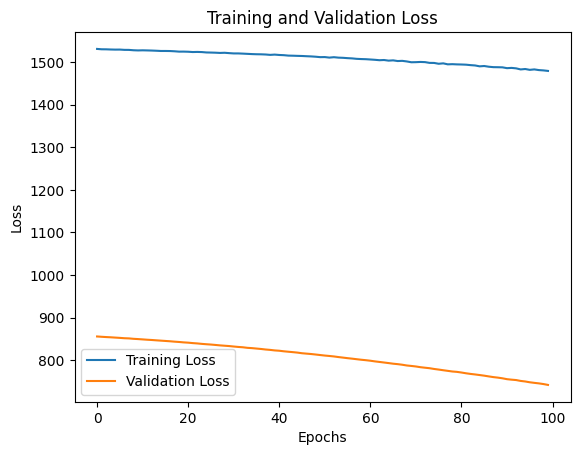

In [56]:
# Plot ค่า loss และ val_loss
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [58]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print(f'MSE Train: {mse_train:.2f}')
print(f'R² Train: {r2_train:.2f}')

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'MSE Test: {mse_test:.2f}')
print(f'R² Test: {r2_test:.2f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
MSE Train: 1478.85
R² Train: 0.03
MSE Test: 742.16
R² Test: 0.07
